In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [6]:
train_data = pd.read_csv("/content/data/mnist_train.csv")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy test: 0.80275
accuracy train: 0.8032777777777778


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy test: 0.8804166666666666
accuracy train: 0.8809444444444444
accuracy test: 0.9028333333333334
accuracy train: 0.9081666666666667


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


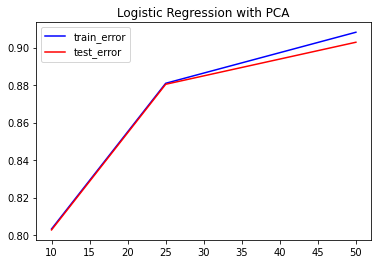

In [7]:
from scipy.sparse.linalg.eigen import test
dimensions=[10,25,50]
train_errors=[]
test_errors=[]
for i in dimensions:

  y_train=train_data.iloc[:,0]
  x_train=train_data.iloc[:,1:785]
  x_train = x_train/255.0
  x=StandardScaler().fit_transform(x_train)
  pca=PCA(i)
  x=pca.fit_transform(x)

  X_train, X_test, y_train, y_test = train_test_split(x, y_train, test_size = 0.2, train_size = 0.3 ,random_state = 10)
  logisticRegr = LogisticRegression(solver = 'lbfgs')
  logisticRegr.fit(X_train, y_train)
  y_pred_test = logisticRegr.predict(X_test)
  y_pred_train = logisticRegr.predict(X_train)
  test_error=metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test)
  train_error=metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train)
  print("accuracy test:", test_error)
  print("accuracy train:",  train_error)
  test_errors.append(test_error)
  train_errors.append(train_error)

plt.plot(dimensions,train_errors,color='blue',label='train_error')
plt.plot(dimensions,test_errors,color='red',label='test_error')
plt.title("Logistic Regression with PCA")
plt.legend()

accuracy test: 0.8343333333333334
accuracy train: 0.8365
accuracy test: 0.8721666666666666
accuracy train: 0.872
accuracy test: 0.8908333333333334
accuracy train: 0.8938888888888888


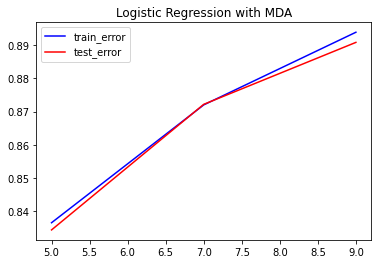

In [8]:
from scipy.sparse.linalg.eigen import test
dimensions=[5,7,9]
train_errors=[]
test_errors=[]
for i in dimensions:

  y_train=train_data.iloc[:,0]
  x_train=train_data.iloc[:,1:785]
  x_train = x_train/255.0
  lda=LinearDiscriminantAnalysis(n_components=i)
  x=lda.fit(x_train,y_train).transform(x_train)
  
  X_train, X_test, y_train, y_test = train_test_split(x, y_train, test_size = 0.2, train_size = 0.3 ,random_state = 10)
  logisticRegr = LogisticRegression(solver = 'lbfgs')
  logisticRegr.fit(X_train, y_train)
  y_pred_test = logisticRegr.predict(X_test)
  y_pred_train = logisticRegr.predict(X_train)
  test_error=metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test)
  train_error=metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train)
  print("accuracy test:", test_error)
  print("accuracy train:",  train_error)
  test_errors.append(test_error)
  train_errors.append(train_error)

plt.plot(dimensions,train_errors,color='blue',label='train_error')
plt.plot(dimensions,test_errors,color='red',label='test_error')
plt.title("Logistic Regression with MDA")
plt.legend()